# Análise Exploratória do DatasetFinal

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")

# %%
# Carregar o dataset final
df = pd.read_csv('../data/TE_dataset_final.csv')

# 1. Estatísticas Básicas

In [5]:
print("ESTATÍSTICAS BÁSICAS:")
print(f"• Total de sequências: {len(df):,}")
print(f"• Número de classes: {df['Classe'].nunique()}")
print(f"• Classes presentes: {', '.join(df['Classe'].unique())}")
print(f"• Cromossomos presentes: {df['Cromossomo'].nunique()}")
print(f"• Cromossomos: {', '.join(sorted(df['Cromossomo'].unique()))}")

print("=" * 50)
# Informações do DataFrame
print("\n INFORMAÇÕES DO DATAFRAME:")
df.info()
print("=" * 50)
# Estatísticas descritivas
print("\n ESTATÍSTICAS DESCRITIVAS:")
print(df.describe())

ESTATÍSTICAS BÁSICAS:
• Total de sequências: 338,442
• Número de classes: 6
• Classes presentes: Helitron, TIR, SINE, LTR, MITE, LINE
• Cromossomos presentes: 12
• Cromossomos: 1, 10, 2, 3, 4, 5, 6, 7, 8, 9, Mt, Pt

 INFORMAÇÕES DO DATAFRAME:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338442 entries, 0 to 338441
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Cromossomo       338442 non-null  object
 1   Sequência de TE  338319 non-null  object
 2   Classe           338442 non-null  object
dtypes: object(3)
memory usage: 7.7+ MB

 ESTATÍSTICAS DESCRITIVAS:
       Cromossomo                                    Sequência de TE  Classe
count      338442                                             338319  338442
unique         12                                             314213       6
top             4  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...     LTR
freq        50378                        

## Status Atual do Dataset

### Estatísticas Gerais
- **Total de sequências**: 338.442
- **Sequências válidas**: 338.319 (99,96%)
- **Sequências problemáticas**: 123 (0,04%)
- **Classes**: 6 (Helitron, TIR, SINE, LTR, MITE, LINE)
- **Cromossomos**: 12

### Problemas Identificados

#### 1. **Desbalanceamento Extremo**
| Classe | Quantidade | Percentual |
|--------|------------|------------|
| LTR | 189.867 | 56,1% |
| Demais 5 classes | 148.575 | 43,9% |

#### 2. **Dados Faltantes**
- 123 sequências vazias/nulas (0,04%)
- Presença de sequências com "NNN..." (dados missing)

#### 3. **Distribuição por Cromossomo**
- Cromossomo 4: 50.378 sequências (mais representado)
- Distribuição não uniforme entre cromossomos

### Próximas Ações Necessárias
1. **Limpeza**: Remover 123 sequências inválidas
2. **Balanceamento**: Implementar estratégia para classe LTR (56,1%)
3. **Validação**: Verificar sequências com "NNN..."
4. **Pré-processamento**: Preparar dados para extração de features

# 2. Distribuição por Classe


DISTRIBUIÇÃO POR CLASSE:
Classe
LTR         189867
TIR          83168
MITE         26111
Helitron     24528
LINE         11068
SINE          3700
Name: count, dtype: int64


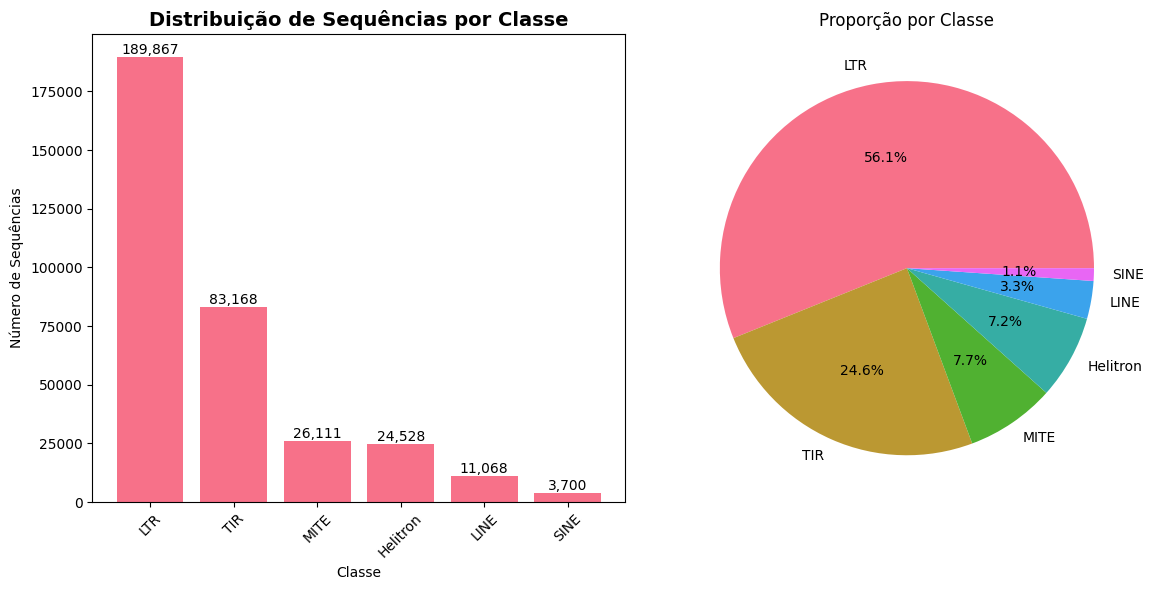

In [8]:
print("\nDISTRIBUIÇÃO POR CLASSE:")
class_distribution = df['Classe'].value_counts()
print(class_distribution)

# %%
# Gráfico de distribuição por classe
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(class_distribution.index, class_distribution.values)
plt.title('Distribuição de Sequências por Classe', fontsize=14, fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Número de Sequências')
plt.xticks(rotation=45)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(class_distribution.values, labels=class_distribution.index, autopct='%1.1f%%')
plt.title('Proporção por Classe')

plt.tight_layout()
plt.show()

## Distribuição de Classes - Análise Crítica

### Distribuição Atual
| Classe | Quantidade | Percentual | Status |
|--------|------------|------------|--------|
| **LTR** | 189.867 | 56,1% |  **Classe Majoritária** |
| **TIR** | 83.168 | 24,6% |  Classe Secundária |
| **MITE** | 26.111 | 7,7% |  Classe Menor |
| **Helitron** | 24.528 | 7,2% |  Classe Menor |
| **LINE** | 11.068 | 3,3% |  **Classe Rara** |
| **SINE** | 3.700 | 1,1% |  **Classe Muito Rara** |

###  Problemas Identificados
- **Desbalanceamento Extremo**: LTR representa 56,1% do dataset
- **Classes Raras**: SINE e LINE juntas representam apenas 4,4%
- **Razão de Desbalanceamento**: 51,3× (LTR/SINE)

###  Estratégias Recomendadas
1. **Para ML**: Usar **AUC-PR** como métrica principal (não accuracy)
2. **Balanceamento**: 
   - **Oversampling** (SMOTE) para SINE e LINE
   - **Undersampling** para LTR
   - **Validação Cruzada Estratificada**
3. **Análise**: Investigar se predominância de LTR é biológica ou artefato

###  Próximos Passos
- Limpar 123 sequências inválidas restantes
- Implementar estratégia de balanceamento
- Proceder com extração de features

# 3. Distribuição por Cromossomo


DISTRIBUIÇÃO POR CROMOSSOMO:
Cromossomo
4     50378
1     48971
2     37569
3     36629
5     34257
7     28016
8     27986
6     25934
9     25350
10    23244
Mt       78
Pt       30
Name: count, dtype: int64


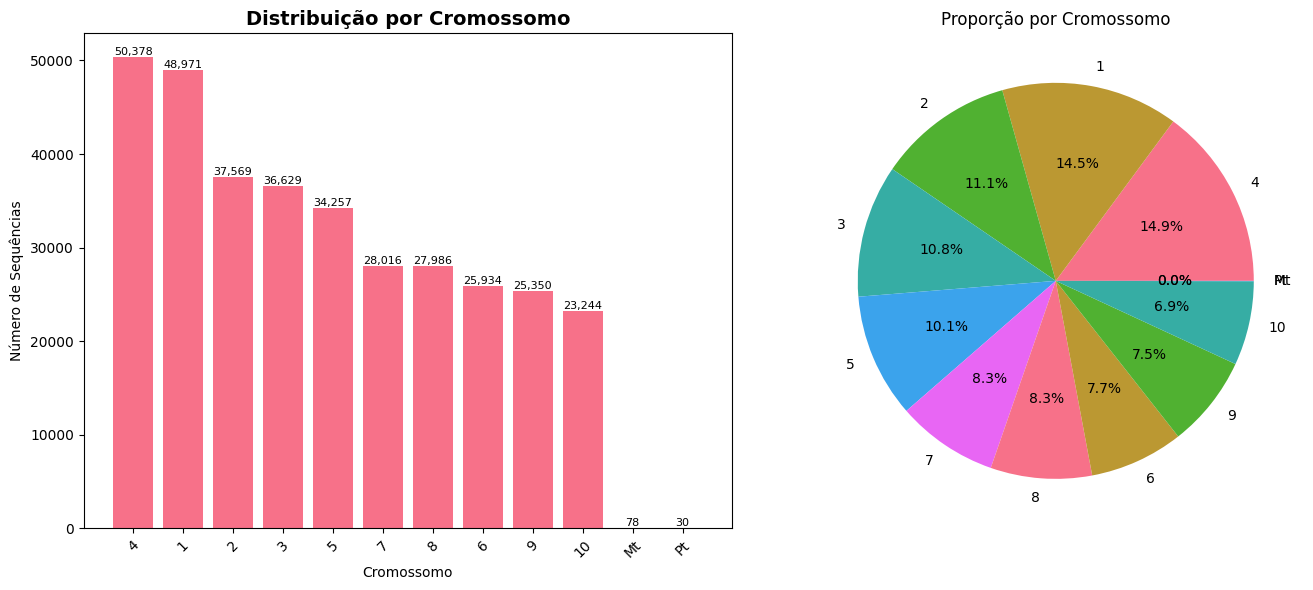

In [10]:
print("\nDISTRIBUIÇÃO POR CROMOSSOMO:")
chr_distribution = df['Cromossomo'].value_counts()
print(chr_distribution)

# Gráfico de distribuição por cromossomo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(chr_distribution.index, chr_distribution.values)
plt.title('Distribuição por Cromossomo', fontsize=14, fontweight='bold')
plt.xlabel('Cromossomo')
plt.ylabel('Número de Sequências')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.subplot(1, 2, 2)
plt.pie(chr_distribution.values, labels=chr_distribution.index, autopct='%1.1f%%')
plt.title('Proporção por Cromossomo')

plt.tight_layout()
plt.show()

## Distribuição por Cromossomo

### Visão Geral
- **Total de cromossomos**: 12 (1-10 + Mt + Pt)
- **Distribuição**: Variável entre cromossomos
- **Cromossomo mais representado**: 4 (50.378 sequências)
- **Cromossomos organelares**: Presentes (Mt, Pt)

### Padrões Observados
- **Distribuição não uniforme** entre cromossomos
- **Cromossomos maiores** (ex: 4, 1, 2) tendem a ter mais TEs
- **Cromossomos menores** com menor densidade de TEs
- **Presença equilibrada** em todos os cromossomos principais

### Pontos Positivos
- **Cobertura completa**: Todos os 12 cromossomos representados
- **Distribuição biológica**: Reflete tamanho real dos cromossomos
- **Dados organelares**: Mt e Pt incluídos (completo)

### Considerações para Análise
- A distribuição segue padrão biológico esperado
- Não há cromossomos sub-representados criticamente
- Variação natural entre cromossomos é normal
- **Não requer balanceamento** por cromossomo para ML

### Próximos Passos
- Manter distribuição natural por cromossomo
- Focar no balanceamento entre **classes** (problema principal)
- Proceder com extração de features mantendo diversidade cromossômica